## Neural Network and PyTorch Basics

In [1]:
import torch
torch.__version__

'2.3.0+cpu'

In [2]:
# converts a Python list into a PyTorch tensor. The torch.tensor function takes the list mylist and creates a tensor mytensor from it.
mylist = [1,2,3,4]
mytensor = torch.tensor(mylist)
mytensor

tensor([1, 2, 3, 4])

In [3]:
# creates a NumPy array myarr, and then converts this array into a PyTorch tensor mytensor_2 using torch.from_numpy.
import numpy as np
myarr = np.array([[1,2],[3,4]])
mytensor_2 = torch.from_numpy(myarr)
mytensor_2

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [4]:
# creates a 2x3 tensor filled with zeros. The shape of the tensor is specified by the tuple (2, 3).
torch.zeros((2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [5]:
torch.ones((2,3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [6]:
torch.rand((2,3))

tensor([[0.4592, 0.2598, 0.5032],
        [0.2709, 0.3052, 0.1236]])

In [7]:
# creates a tensor with the same shape as mytensor_2, but filled with ones.
torch.ones_like(mytensor_2)

tensor([[1, 1],
        [1, 1]], dtype=torch.int32)

## Tensor operations

In [8]:
myarr = np.array([[1.0, 2.0], [3.0, 4.0]])
tensor1 = torch.from_numpy(myarr)
tensor1 + 1

tensor([[2., 3.],
        [4., 5.]], dtype=torch.float64)

In [9]:
tensor1 / tensor1

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

In [10]:
tensor1.sin()

tensor([[ 0.8415,  0.9093],
        [ 0.1411, -0.7568]], dtype=torch.float64)

In [11]:
tensor1.cos()

tensor([[ 0.5403, -0.4161],
        [-0.9900, -0.6536]], dtype=torch.float64)

In [12]:
tensor1.sqrt()

tensor([[1.0000, 1.4142],
        [1.7321, 2.0000]], dtype=torch.float64)

In [13]:
tensor2 = torch.tensor([[5, 6], [7, 8]])
torch.cat([tensor1, tensor2], 0)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], dtype=torch.float64)

In [14]:
torch.hstack((tensor1, tensor2))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]], dtype=torch.float64)

In [15]:
torch.vstack((tensor1, tensor2))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], dtype=torch.float64)

In [16]:
torch.reshape(tensor1, (1, -1))

tensor([[1., 2., 3., 4.]], dtype=torch.float64)

## Perceptron implementation

In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Generate the dataset
X, y = datasets.make_blobs(n_samples=100,n_features=2, centers=2, random_state=42, shuffle=True)

Text(0, 0.5, 'Feature 2')

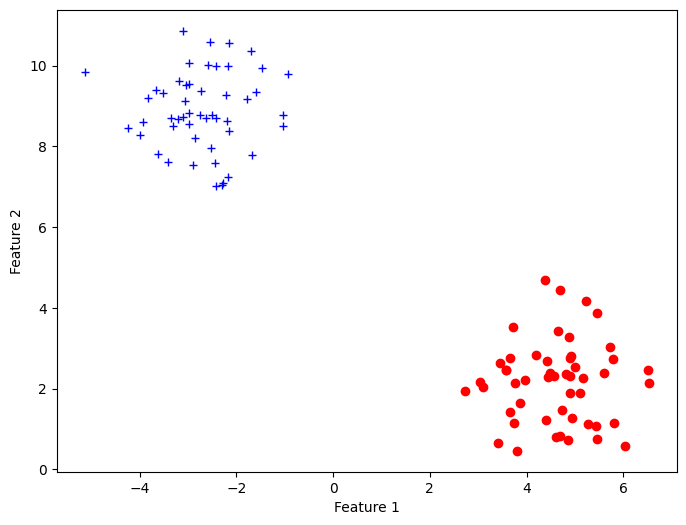

In [18]:
fig = plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'b+')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [19]:
# Add the bias term to X
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [20]:
# Define the predict function
def predict(X, weight):
 return np.where(np.dot(X, weight) > 0.0, 1, 0)

In [21]:
# Define the fit function
def fit(X, y, niter=100, alpha=0.1):
    weight = np.random.random(X.shape[1])
    for i in range(niter):
        for xi, target in zip(X, y):
            weight += alpha * (target - predict(xi, weight)) * xi
    return weight

In [22]:
# Train the perceptron
w = fit(X, y)
w

array([ 0.59929884,  0.55626953, -0.08273465])

In [23]:
# Select random elements for testing
random_elements = np.random.choice(X.shape[0], size=5, replace=False)
X_test = X[random_elements, :]

In [24]:
# Predict and print results
print(predict(X_test, w))
print(y[random_elements])

[0 0 1 1 1]
[0 0 1 1 1]
